<a href="https://colab.research.google.com/github/hema082004/Fake_news/blob/main/another1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Cell 1: Clone the dataset repository
!git clone https://github.com/prab786/Multi-Dimensional-Telugu-Fake-Newsdataset.git

# Change directory into the repo
%cd Multi-Dimensional-Telugu-Fake-Newsdataset

# Just to confirm files are there
!ls


Cloning into 'Multi-Dimensional-Telugu-Fake-Newsdataset'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 26 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 492.66 KiB | 7.24 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/Multi-Dimensional-Telugu-Fake-Newsdataset/Multi-Dimensional-Telugu-Fake-Newsdataset
'_Dataset Annotation questions.pdf'
 dataset.json
 english_translated.json
 Guidelines.pdf
 label.csv
'Q3 and4_At whom or what is the false news targeted_ and Effect - Sheet1.csv'


In [15]:
# Step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
# Cell 3: Load datasets
fake_df = pd.read_csv('/content/fakeNews_dataset.csv',
                      engine='python',
                      on_bad_lines='skip')   # has columns: statement, link

real_df = pd.read_csv('/content/real_news.csv',
                      engine='python',
                      on_bad_lines='skip')   # has column: statement

print("Fake shape:", fake_df.shape)
print("Real shape:", real_df.shape)

print("\nFake columns:", fake_df.columns)
print("Real columns:", real_df.columns)


Fake shape: (1313, 2)
Real shape: (1599, 1)

Fake columns: Index(['statement', 'link'], dtype='object')
Real columns: Index(['statement'], dtype='object')


In [24]:
# Cell 4: Keep only text column and add label

# Use the 'statement' column as the text for both
fake_df = fake_df[['statement']].copy()
real_df = real_df[['statement']].copy()

# Add label: fake = 0, real = 1
fake_df['label'] = 0
real_df['label'] = 1

# Rename 'statement' → 'text' for convenience
fake_df.rename(columns={'statement': 'text'}, inplace=True)
real_df.rename(columns={'statement': 'text'}, inplace=True)

# Combine both datasets
data = pd.concat([fake_df, real_df], axis=0).reset_index(drop=True)

# Drop rows with missing text
data.dropna(subset=['text'], inplace=True)

print(data.head())
print("\nClass distribution:\n", data['label'].value_counts())


                                                text  label
0   ఇటీవల ఉపఎన్నిక జరిగిన అసెంబ్లీ స్థానాలలో 6 ND...      0
1   రాష్ట్రాలు చేస్తున్న అప్పులను నియంత్రించేందుక...      0
2   భారత దేశానికి స్వాతంత్ర్యం తెచ్చింది ముహమ్మద్...      0
3   పునీత్ రాజ్‌కుమార్ మరణానికి సంబంధించి డాక్టర్...      0
4   నరేంద్ర మోదీ టీ అమ్మానని చెప్పుకునే వాద్‌నగర్...      0

Class distribution:
 label
1    1599
0    1313
Name: count, dtype: int64


In [25]:
# Cell 5: Train-test split
X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 2329
Test size: 583


In [26]:
# Cell 6: TF-IDF and model training

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Passive Aggressive Classifier
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)


PassiveAggressiveClassifier()

Accuracy: 0.7479

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       263
           1       0.77      0.76      0.77       320

    accuracy                           0.75       583
   macro avg       0.75      0.75      0.75       583
weighted avg       0.75      0.75      0.75       583



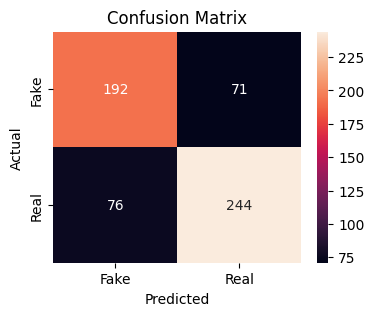

In [27]:
# Cell 7: Evaluation
y_pred = model.predict(X_test_tfidf)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
# Cell 8: Test with a new example
new_text = ["తెలంగాణ ప్రభుత్వంపై కొత్త సంక్షేమ పథకం ప్రారంభించినట్లు వార్తలు వచ్చాయి"]
new_vec = tfidf.transform(new_text)
pred = model.predict(new_vec)

print("Prediction:", "Real News" if pred[0] == 1 else "Fake News")


Prediction: Fake News
